# Predicting the solubilities of organic compounds

## 2. Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('Data/df_final.csv')
df.head()

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES,Mol,SpAbs_A,SpDiam_A,VR1_A,nAromAtom,nBridgehead,...,n5Ring,nHRing,n5HRing,nAHRing,n6AHRing,nFRing,nFHRing,nFARing,nRot,GhoseFilter
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x0000011F0D9...,5.818626,4.148627,11.637367,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x0000011F0D9...,4.000000,4.000000,8.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x0000011F0D9...,6.000000,4.000000,11.530010,0,0,...,0,0,0,0,0,0,0,0,1,0
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x0000011F0D9...,5.226252,3.695518,8.629874,0,0,...,0,0,0,0,0,0,0,0,1,0
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x0000011F0D9...,7.211103,4.605551,17.881697,0,0,...,0,0,0,0,0,0,0,0,1,0


We currently have 161 descriptors, making it challenging to analyze them all.

We'll focus on a few of them, but we’ll begin by examining our targets first - measured log(solubility:mol/L).

In [3]:
df['measured log(solubility:mol/L)'].describe()

count    1144.000000
mean       -3.057997
std         2.096502
min       -11.600000
25%        -4.332250
50%        -2.870500
75%        -1.600000
max         1.580000
Name: measured log(solubility:mol/L), dtype: float64

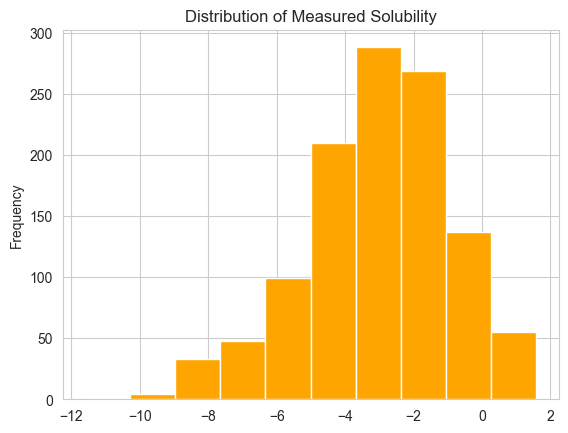

In [4]:
df['measured log(solubility:mol/L)'].plot(
    kind='hist', 
    edgecolor='white',
    color='orange',
    title='Distribution of Measured Solubility')
plt.show()

#### Correlation of desriptors and measured log(solubility)

In [5]:
selected_columns = [1, 5] + list(range(6, len(df.columns)))
new_df = df.iloc[:, selected_columns]
corr = new_df.corr()
corr

,measured log(solubility:mol/L),SpAbs_A,SpDiam_A,VR1_A,nAromAtom,nBridgehead,nHetero,nN,nO,nS,...,n5Ring,nHRing,n5HRing,nAHRing,n6AHRing,nFRing,nFHRing,nFARing,nRot,GhoseFilter
measured log(solubility:mol/L),1.000000,-0.593810,-0.499638,-0.042746,-0.489810,-0.095359,-0.179433,0.066841,0.059156,-0.061972,...,-0.151367,0.080268,0.035581,0.020879,0.066909,-0.274979,-0.046344,-0.206351,-0.238508,-0.319041
SpAbs_A,-0.593810,1.000000,0.768101,0.263960,0.508883,0.083144,0.590964,0.246528,0.585815,0.095211,...,0.378788,0.388476,0.234398,0.414507,0.292404,0.483546,0.285735,0.479815,0.379663,0.579323
SpDiam_A,-0.499638,0.768101,1.000000,0.073585,0.501674,0.179813,0.513180,0.278524,0.390178,0.055546,...,0.355444,0.330033,0.168102,0.291722,0.229890,0.479363,0.266708,0.410449,0.051323,0.506835
VR1_A,-0.042746,0.263960,0.073585,1.000000,-0.031358,-0.004722,0.159333,-0.024607,0.274959,-0.012268,...,0.141289,0.233501,0.111313,0.353836,0.371189,0.075984,-0.013174,0.108378,0.090348,-0.029163
nAromAtom,-0.489810,0.508883,0.501674,-0.031358,1.000000,-0.091381,0.151455,0.266378,-0.041361,-0.047544,...,0.009754,0.246760,0.163370,-0.006890,-0.123995,0.359308,0.324859,0.027285,-0.092164,0.277967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nFRing,-0.274979,0.483546,0.479363,0.075984,0.359308,0.207773,0.095911,0.106608,0.143632,-0.000610,...,0.463403,0.412873,0.236909,0.255344,0.083294,1.000000,0.687639,0.710020,-0.203799,0.256831
nFHRing,-0.046344,0.285735,0.266708,-0.013174,0.324859,0.068567,0.234152,0.335879,0.151968,0.092941,...,0.259845,0.663241,0.392103,0.388296,0.126492,0.687639,1.000000,0.454967,-0.085390,0.175315
nFARing,-0.206351,0.479815,0.410449,0.108378,0.027285,0.295710,0.197269,0.017301,0.267233,0.030342,...,0.520514,0.296663,0.141693,0.414046,0.171804,0.710020,0.454967,1.000000,-0.099911,0.325052
nRot,-0.238508,0.379663,0.051323,0.090348,-0.092164,-0.079789,0.322349,0.083149,0.406317,0.282955,...,-0.073410,0.009149,0.034257,0.077017,0.074574,-0.203799,-0.085390,-0.099911,1.000000,0.272600


#### Top 4 descriptors with highest correlation relative to measured log(solubility)

In [6]:
sorted_corr = abs(corr[['measured log(solubility:mol/L)']]).sort_values(by='measured log(solubility:mol/L)', ascending=False)
sorted_corr = sorted_corr.iloc[1:5, : ] # Taking only first 4 descriptors
sorted_corr.rename(columns= {'measured log(solubility:mol/L)': 'correlation_coef'}, inplace = True)
sorted_corr

,correlation_coef
FilterItLogS,0.863686
PEOE_VSA6,0.705928
SpAbs_A,0.593810
C3SP2,0.518606


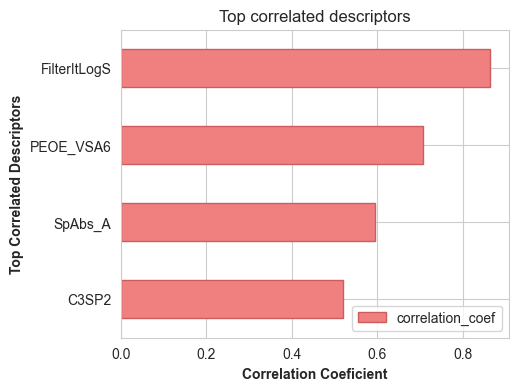

In [7]:
sorted_corr.plot(
    kind='barh',
    figsize=(5, 4),
    ylabel='Top Correlated Descriptors',
    color='lightcoral', 
    edgecolor='indianred')
plt.xlabel('Correlation Coeficient', weight='bold')
plt.ylabel('Top Correlated Descriptors', weight='bold')
plt.title('Top correlated descriptors')
plt.gca().invert_yaxis()
plt.show()

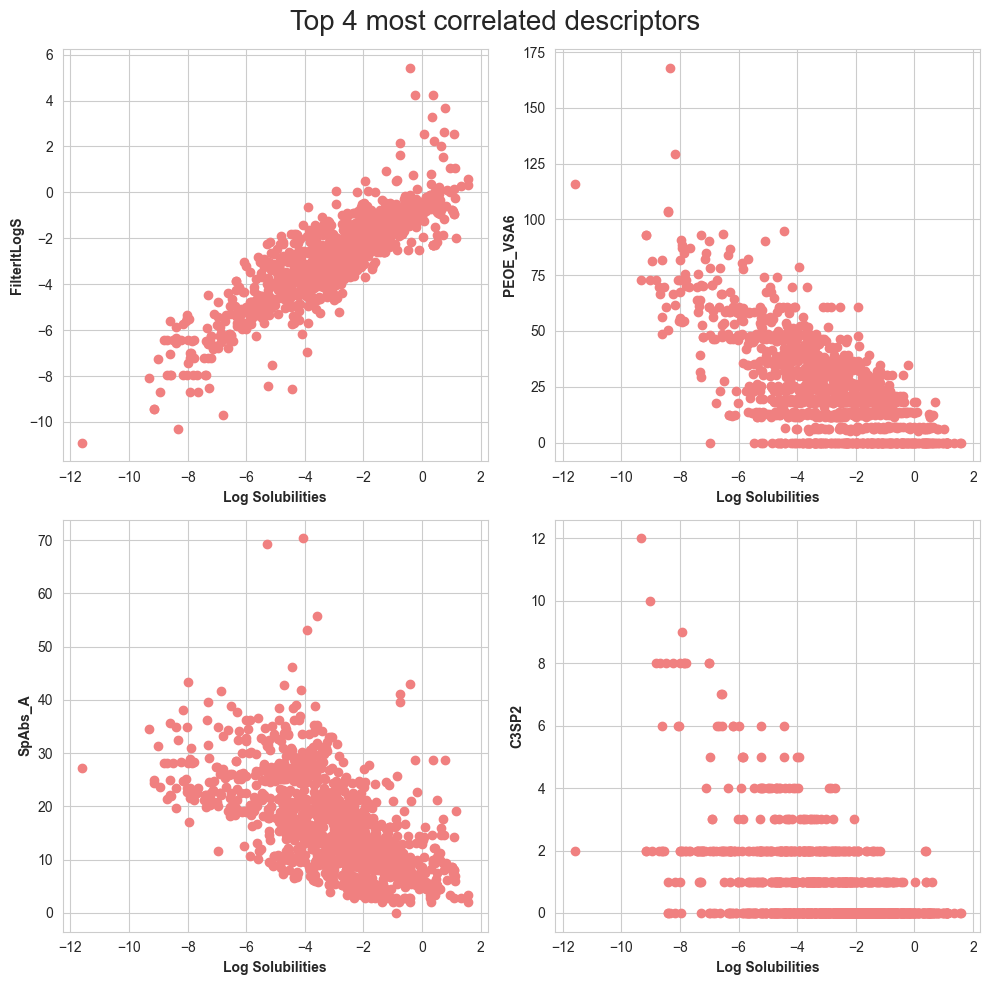

In [12]:
fig = plt.figure(4, figsize=(10, 10))

for index, descriptor in enumerate(sorted_corr.index):
    ax = fig.add_subplot(221+index)
    plt.scatter(
        x=df['measured log(solubility:mol/L)'],
        y=df[descriptor],
        color='lightcoral')
    ax.set_xlabel('Log Solubilities', weight='bold')
    ax.set_ylabel(descriptor, weight='bold')
fig.suptitle('Top 4 most correlated descriptors', fontsize=20)
plt.tight_layout()
plt.show()

Only the first descriptor (FilterItLogS) shows a positive correlation with log solubility, which is logical since it represents the estimate of solubility.